# 查看数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('input/train.csv', index_col=0)
test_df = pd.read_csv('input/test.csv', index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 提取训练样本和训练label

In [5]:
train_x=train_df.drop('SalePrice',axis=1)
train_y=train_df['SalePrice']
train_x.shape

(1460, 79)

# 合并训练样本和测试样本
这里的合并是为了将训练样本和测试样本一起做数据预处理以及特征工程

其实这里我有一个疑问，将训练样本和测试样本一起做预处理，比如归一化等等，是否会将测试样本中的信息带入到训练样本中，从而导致类似于‘用测试样本训练’的问题。

不过其实想想测试样本也没有label，光靠这样学不到什么东西，因此也就没有关系了。

## train_y向正态分布转化
**先处理train_y,让它尽可能的符合正态分布**

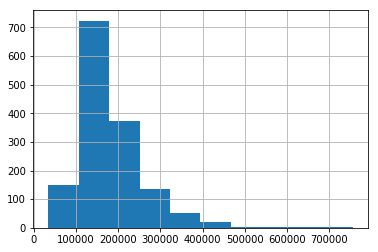

In [6]:
%matplotlib inline
train_y.hist()

**利用log(value+1),让其符合正太分布**

In [7]:
train_y_log=pd.DataFrame({'logp1':np.log1p(train_y)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111052668>]],
      dtype=object)

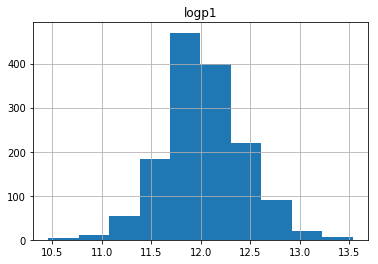

In [8]:
%matplotlib inline
train_y_log.hist()

至于为什么说要把结果转化成符合正态分布的情况，我觉得下面这篇文章应该有讲，但是不想看啊………………

http://assets.cambridge.org/97805217/60119/excerpt/9780521760119_excerpt.pdf

还有这个quora：

https://www.quora.com/How-does-skewness-impact-regression-model

里面说会影响参数估计和置信区间，呃，统计学的不好，= - 

## 训练样本和测试样本的数据预处理

### 数据合并

In [9]:
all_df=pd.concat([train_x,test_df])
all_df.shape

(2919, 79)

### 处理用numerical变量表示的category特征
pandas的dataframe中，有很多特征是用数字来表示的，但它其实表示的是一些类别，最简单的比如是0~6分别表示周一到周日。

对于这些量，我们需要将其从数字量（numerical）转化为字符串(string)，才能让pandas识别他为category量。

那么哪些量，它表面上是numerical量，但实际上是category量呢，光靠看是看不出来的，这个时候就要看数据说明了！！！

看了数据说明，我们发现，其中有三个特征是用numerical量来表示category的：

    MSSubClass
    OverallQual
    OverallCond

In [10]:
all_df[['MSSubClass','OverallQual','OverallCond']].head()

,MSSubClass,OverallQual,OverallCond
Id,,,
1,60,7,5
2,20,6,8
3,60,7,5
4,70,7,5
5,60,8,5


In [11]:
all_df['MSSubClass']=all_df['MSSubClass'].astype('str')
all_df['OverallQual']=all_df['OverallQual'].astype('str')
all_df['OverallCond']=all_df['OverallCond'].astype('str')

In [12]:
all_df.MSSubClass.value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

### 对Category特征进行编码
在最后将样本输入到模型时，我们要求数据都是数字型的。

而对于category类的特征，我们通常使用one_hot编码来实现。

pandas提供了方便的包来完成这个任务。

当我们用numerical来表达categorical的时候，要注意，数字本身有大小的含义，所以乱用数字会给之后的模型学习带来麻烦。于是我们可以用One-Hot的方法来表达category。

pandas自带的get_dummies方法，可以帮你一键做到One-Hot。（下面那个就是哑变量了）

In [13]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**上面只是演示，下面就把所有的category量给one-hot了**

In [14]:
all_dummy=pd.get_dummies(all_df)
all_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,...,0,0,0,1,0,0,0,0,1,0


### 对numerical数据进行填补
在numerical数据中，最麻烦的是会有很多Nan数据。

当某一个特征中的Nan量很多的时候，可以考虑丢弃这个特征；
当某一个特征中的Nan量适中，不算很少的时候，可以考虑把这个Nan作为一个独立的类别处理；
当某一个特征中的Nan量比较少的时候，可以用0值，或者这一列的均值来填补的方法完成。

**查看每一列中的null数据**

In [15]:
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
GarageCars        1
BsmtFinSF2        1
dtype: int64

**这里我们简单一点，每一列null值都用列均值填充**

In [16]:
col_mean=all_dummy.mean()
col_mean.shape

(320,)

In [17]:
all_dummy=all_dummy.fillna(col_mean)
all_dummy.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition_Partial    0
SaleCondition_Normal     0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
dtype: int64

### 对numerical数据进行归一化
不同特征的数据其取值范围不同，如果不归一化的话，会导致收敛很慢，甚至无法收敛的情况。

归一化有这么几种操作：

    1. 比例归一化，（x-xmin)/(xmax-xmin)
    2. 标准分布归一化，(x-xmean)/xstd

下面我们就用标准分布归一化，这样特征的均值就是0，方差就是1了.

另外注意，category转化成的one-hot编码特征列，虽然现在也是数字类型，但是不用进行归一化。

因此，我们需要提取出仅仅是numerical类型的数据。

In [18]:
# 注意这里是从one_hot编码前的dataframe中获取数据。
numerical_cols=all_df.columns[all_df.dtypes != 'object']
numerical_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

**获得numerical列的均值和方差**

In [19]:
numerical_mean=all_dummy.loc[:,numerical_cols].mean()
numerical_std=all_dummy.loc[:,numerical_cols].std()
numerical_mean

LotFrontage         69.305795
LotArea          10168.114080
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea             2.251799
MiscVal             50.825968
MoSold               6.213087
YrSold            2007.792737
dtype: flo

**进行归一化**

In [20]:
all_dummy.loc[:,numerical_cols]=(all_dummy.loc[:,numerical_cols]-numerical_mean)/numerical_std
all_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,-0.444252,-0.773728,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,0.477029,0.261030,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,-0.299025,-0.610614,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,-0.671168,-0.506118,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,0.211537,-0.037164,...,0,0,0,1,0,0,0,0,1,0


In [21]:
all_dummy['YearRemodAdd'].mean()

7.849911957944024e-16

In [22]:
all_dummy.shape

(2919, 320)

# 训练模型
接下来就是训练模型的时间了。

目前由于是regression问题，我们这里选用几个简单的回归模型来尝试。

**训练数据和测试数据分开**
由于之前一起做预处理的，现在需要把训练数据和测试数据分开。

In [23]:
train_x_dummy=all_dummy.iloc[:train_x.shape[0]]
test_x_dummy=all_dummy.iloc[train_x.shape[0]:]
train_x_dummy.shape
test_x_dummy.shape

(1459, 320)

In [24]:
train_y_dummy=pd.DataFrame(train_y_log)
train_y_dummy.shape

(1460, 1)

## 简单线性模型训练
接下来，就用linearregression，lasso(L1正则化),ridge(L2正则化），来进行训练。

### LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

LinearRegression就是简单的线性回归，默认是可以训练结局的，并且没有什么超参数需要调。

In [26]:
model_lr=LinearRegression()
model_lr.fit(train_x_dummy,train_y_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
result_lr=model_lr.predict(test_x_dummy)
result_lr[:5]

array([[11.70343018],
       [12.08931732],
       [12.12783813],
       [12.22059631],
       [12.18731689]])

**我们画图看一下训练集的预测结果和真实结果**

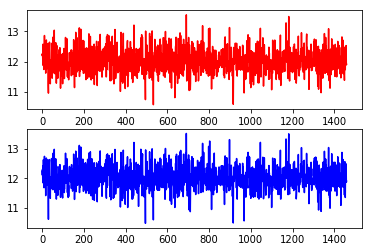

In [28]:
%matplotlib inline
plt.subplot(211)
plt.plot(range(0,len(train_x_dummy)),model_lr.predict(train_x_dummy),'r')
plt.subplot(212)
plt.plot(range(0,len(train_x_dummy)),train_y_dummy,'b')
plt.show()

**看一下评分**

In [29]:
from sklearn.metrics import mean_squared_error
result_mse=mean_squared_error(train_y_dummy,model_lr.predict(train_x_dummy))
result_mse

0.008386893520688622

**看一下预测结果**

从预测结果，我们发现预测结果差的惨不忍睹，怪不得lr对训练数据的mse都要比lasso和ridge要好，原来过拟合了。

从而导致它在测试数据上的预测结果奇葩的不行。 。 

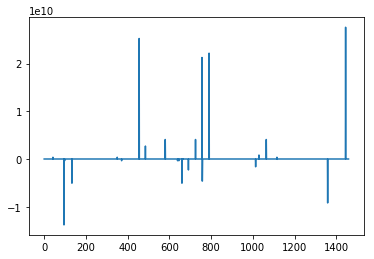

In [30]:
%matplotlib inline
plt.plot(range(0,len(test_x_dummy)),model_lr.predict(test_x_dummy))
plt.show()

### Lasso（L1正则化）

**Lasso是添加了L1正则化的线性回归器，我们就用RMSE来进行评分**

In [31]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

**准备好等待被测试的alpha的值**

In [32]:
pre_alphas_la=np.linspace(0.0001,0.3,100)

**开始进行cross-validation**

注意一下，cross-val-score的值被反了一下，是为了求最大值，因此我们需要人文的给他反回来。

In [33]:
# model_la=Lasso()
# model_la.fit(train_x_dummy,train_y_dummy['logp1'])
result_dic_la={}
for alpha_la in pre_alphas_la:
    model_la=Lasso(alpha=alpha_la)
    test_score = np.mean(-cross_val_score(model_la, train_x_dummy, train_y_dummy['logp1'], cv=10, scoring='neg_mean_squared_error'))
    result_dic_la[alpha_la]=test_score
min(result_dic_la.values())

0.02117012764057897

**拿到最优alpha**

In [34]:
result_dic_la_soreted=sorted(result_dic_la.items(),key=lambda item:item[1])
result_dic_la_soreted[0]

(0.0001, 0.02117012764057897)

**开始预测吧**

In [35]:
model_la=Lasso(0.0001)
model_la.fit(train_x_dummy,train_y_dummy)
result_la=model_la.predict(test_x_dummy)
result_la[:5]

array([11.70053631, 11.93199246, 12.1189101 , 12.20998343, 12.18214058])

**绘图看一下结果**

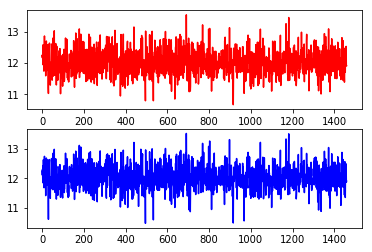

In [36]:
%matplotlib inline
plt.subplot(211)
plt.plot(range(0,len(train_x_dummy)),model_la.predict(train_x_dummy),'r')
plt.subplot(212)
plt.plot(range(0,len(train_x_dummy)),train_y_dummy,'b')
plt.show()

**看一下评分**

In [37]:
result_mse_la=mean_squared_error(train_y_dummy,model_la.predict(train_x_dummy))
result_mse_la

0.009066216735878216

**看一下预测结果**

虽然在训练数据上的mse不比lr好，但是因为lr过拟合了啊，lr在测试数据上的表现简直不能看好吗= - 

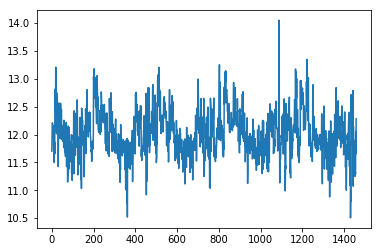

In [38]:
%matplotlib inline
plt.plot(range(0,len(test_x_dummy)),model_la.predict(test_x_dummy))
plt.show()

### Ridge（L2正则化）
Ridge就是L2正则化啦，L1和L2从公式上的区别就是一个是绝对值，一个是平方；

那么从结果上而言，L1可以把某些特征的权重惩罚到0，而L2只能惩罚到很小，却到不了0.

In [39]:
from sklearn.linear_model import Ridge

**这里我们就不依赖库提供的方法，自己来写一下cross_validation**

查了下源代码，发现需要调整的参数也就只有惩罚参数alpha而已。

那么需要我们定义的内容有：

    1. alpha的候选列表。
    2. 评价函数，如何判断不同模型的好坏。
    # 根据项目要求，还是使用mse

**准备alpha列表，这里是从0~0.3的100个数**

In [40]:
pre_alphas=np.linspace(0,15,100)
pre_alphas.shape

(100,)

**将不同的alpha带入，开始fit，并采用mse来进行评分**

In [41]:
results_dic={}
for test_alpha in pre_alphas:
    model_rd=Ridge(alpha=test_alpha)
    score=np.mean(-cross_val_score(model_rd,train_x_dummy,train_y_dummy,cv=10,scoring='neg_mean_squared_error'))
    results_dic[test_alpha]=score
min(results_dic.values())

0.019863454169572196

In [42]:
results_dic_rd_sorted=sorted(results_dic.items(),key=lambda item:item[1])
results_dic_rd_sorted[0]

(9.393939393939394, 0.019863454169572196)

**可视化结果，纵坐标是mse值，横坐标是alpha的值**

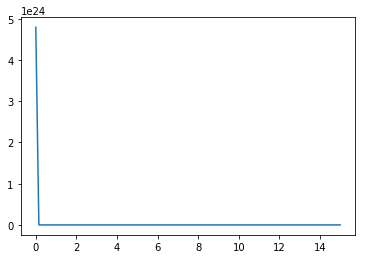

In [43]:
%matplotlib inline
plt.plot(results_dic.keys(),results_dic.values())
plt.show()

**跑一下评分**

In [44]:
model_rd=Ridge(alpha=results_dic_rd_sorted[0][0])
model_rd.fit(train_x_dummy,train_y_dummy)
result_mse_rd=mean_squared_error(train_y_dummy,model_rd.predict(train_x_dummy))
result_mse_rd

0.011987367035311976

**看一下预测结果**

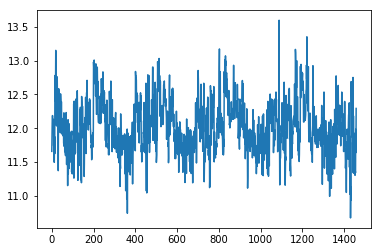

In [45]:
%matplotlib inline
plt.plot(range(0,len(test_x_dummy)),model_rd.predict(test_x_dummy))
plt.show()

## 复杂模型训练

下面，我们将要尝试randoforest，baggin，adaboost和xgboost模型的效果。

### randomforest

* 1）回归树定义。

    对于树模型而言，它不仅可以用作分类问题，也是可以用作回归问题的。

    大体而言嘛，用作回归问题的树模型，可以理解为它是作为一个分段函数去拟合数据，每个通往叶节点的路径就是这个分段子函数的条件。

* 2）随机森林定义。
    
    另外，对于随机森林而言，它的随机体现在两个方面：

        1. 每次随机选取样本来训练。
        2. 每次随机选则特征来生成树。

* 3）随机森林需要调整的超参数。

    另外，对于random而言，可以调整的超参数太多了，比如有：

        1. 总共需要几棵树。
        2. 每棵树需要有几种特征
        3. 每棵树最深要多深。
        4. 用于剪枝的比如，每个分支最少需要被分到多少个样本。
        5. 。。。。

* 4）多超参数的如何求最优。

    这里我们简单一点，就选择用两个值，总共要几棵树以及每棵树需要有几种特征来进行cross-vali1.

    那么在多超参数的情况下，就需要用grid-search的方法来求解了。

**加载randomforest和gridsearch模块**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**准备被优化的超参数**

In [62]:
n_estimators_list=np.linspace(20,200,10).astype(int)
hyper_parametes_rf={'n_estimators':n_estimators_list,'max_features':('auto','sqrt','log2')}

**准备基础的regression**

In [63]:
rand_for=RandomForestRegressor()

**开始gridsearch**

In [64]:
clf=GridSearchCV(rand_for,hyper_parametes_rf)
clf.fit(train_x_dummy,train_y_dummy['logp1'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]), 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**查看一下大家的结果**

In [65]:
clf.grid_scores_

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85458, std: 0.01263, params: {'max_features': 'auto', 'n_estimators': 20},
 mean: 0.85345, std: 0.01659, params: {'max_features': 'auto', 'n_estimators': 40},
 mean: 0.85995, std: 0.01477, params: {'max_features': 'auto', 'n_estimators': 60},
 mean: 0.85952, std: 0.01381, params: {'max_features': 'auto', 'n_estimators': 80},
 mean: 0.86118, std: 0.01111, params: {'max_features': 'auto', 'n_estimators': 100},
 mean: 0.86122, std: 0.01169, params: {'max_features': 'auto', 'n_estimators': 120},
 mean: 0.86287, std: 0.01223, params: {'max_features': 'auto', 'n_estimators': 140},
 mean: 0.86144, std: 0.01118, params: {'max_features': 'auto', 'n_estimators': 160},
 mean: 0.86126, std: 0.01295, params: {'max_features': 'auto', 'n_estimators': 180},
 mean: 0.86205, std: 0.01469, params: {'max_features': 'auto', 'n_estimators': 200},
 mean: 0.84107, std: 0.02007, params: {'max_features': 'sqrt', 'n_estimators': 20},
 mean: 0.85157, std: 0.01370, params: {'max_features': 'sqrt', 'n_esti

**得分最高的超参数组合**

In [66]:
bt_pm=clf.best_params_
bt_pm

{'max_features': 'auto', 'n_estimators': 140}

**最优model**

In [67]:
best_randomforest=RandomForestRegressor(max_features=bt_pm['max_features'],n_estimators=bt_pm['n_estimators'])
best_randomforest.fit(train_x_dummy,train_y_dummy['logp1'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### bagging

randomforest可以看做是一种特殊的bagging，randomforest采用的是树作为基本的回归器。

而bagging可以采用任意的回归器，最后所有弱回归器的结果做一个投票，得到最终结果。

那么其实和randomforest一样，它也有许多的超参数需要调整，我们同样选择回归器个数和每个回归器所用特征数来调整。

**加载bagging模块**

In [68]:
from sklearn.ensemble import BaggingRegressor

**准备训练用超参数**

In [69]:
n_estimators_list=np.linspace(20,200,10).astype(int)
max_features=[train_x_dummy.shape[1]] # 用所有特征
max_features.append(np.sqrt(max_features[0])) # 用所有特征的sqrt
max_features.append(np.log(max_features[0])) # 用所有特征的log
max_features=[int(i) for i in max_features]

hyper_parametes_rf={'n_estimators':n_estimators_list,'max_features':max_features}

**准备基础的模型，这里我们用之前训练好的ridge模型**

In [70]:
base_model=BaggingRegressor(base_estimator=model_rd)

**开始gridsearch**

In [71]:
clf_bag=GridSearchCV(base_model,hyper_parametes_rf)
clf_bag.fit(train_x_dummy,train_y_dummy['logp1'])

GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=9.393939393939394, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200]), 'max_features': [320, 17, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**查看结果**

In [72]:
clf_bag.grid_scores_

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86959, std: 0.02811, params: {'max_features': 320, 'n_estimators': 20},
 mean: 0.87340, std: 0.02845, params: {'max_features': 320, 'n_estimators': 40},
 mean: 0.87250, std: 0.02654, params: {'max_features': 320, 'n_estimators': 60},
 mean: 0.87222, std: 0.02871, params: {'max_features': 320, 'n_estimators': 80},
 mean: 0.87364, std: 0.02898, params: {'max_features': 320, 'n_estimators': 100},
 mean: 0.87377, std: 0.02727, params: {'max_features': 320, 'n_estimators': 120},
 mean: 0.87300, std: 0.02786, params: {'max_features': 320, 'n_estimators': 140},
 mean: 0.87224, std: 0.02727, params: {'max_features': 320, 'n_estimators': 160},
 mean: 0.87368, std: 0.02675, params: {'max_features': 320, 'n_estimators': 180},
 mean: 0.87250, std: 0.02756, params: {'max_features': 320, 'n_estimators': 200},
 mean: 0.62922, std: 0.00876, params: {'max_features': 17, 'n_estimators': 20},
 mean: 0.62590, std: 0.01958, params: {'max_features': 17, 'n_estimators': 40},
 mean: 0.62861, std: 0.0

**最优参数**

In [73]:
clf_bag.best_params_

{'max_features': 320, 'n_estimators': 120}

**最优model**

In [74]:
best_bagging=clf_bag.best_estimator_

### adaboost

准确的说，boost才是一种算法，它的思想是根据上一次回归器/分类器的结果，对样本的权重进行一次更新，下一个模型的训练就基于这个新的权重。

同时，每个子模型不再是拥有相同的权重，而是根据它的得分计算一个新的权重。

adaboost就是其中的一种boost方法。

谢天谢地，adaboost中貌似只有一个n_estimator的超参数要调，这样时间会节省很多。

**加载adaboostregression**

In [46]:
from sklearn.ensemble import AdaBoostRegressor

**构造调整的超参数**

In [47]:
n_estimator_ada=np.linspace(5,100,20).astype(int)
base_model_ada=model_rd

**将不同的超参数带入，开始训练**

In [48]:
result_ada={}
for n_e_ada in n_estimator_ada:
    model_ada=AdaBoostRegressor(base_estimator=base_model_ada,n_estimators=n_e_ada)
    score=np.mean(-cross_val_score(model_ada,train_x_dummy,train_y_dummy['logp1'],cv=10,scoring='neg_mean_squared_error'))
    result_ada[n_e_ada]=score
    
min(result_ada.values())

0.0214090130892586

**排序，拿到最优参数**

In [49]:
result_ada_sorted=sorted(result_ada.items(),key=lambda item:item[1])
result_ada_sorted[0]

(5, 0.0214090130892586)

**绘图查看一下结果**

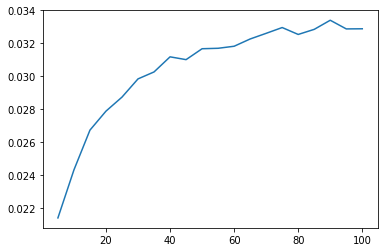

In [50]:
%matplotlib inline
plt.plot(result_ada.keys(),result_ada.values())
plt.show()

**得到最优模型**

In [51]:
best_ada_model=AdaBoostRegressor(n_estimators=result_ada_sorted[0][0])
best_ada_model.fit(train_x_dummy,train_y_dummy['logp1'])

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=5, random_state=None)

### xgboost

赫赫有名的kaggle大杀器，看一下效果吧。

**加载xgboost**

In [52]:
from xgboost import XGBRegressor

**主要超参数为深度**

In [54]:
depth_list=np.linspace(1,10,10).astype(int)
depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**开始训练**

In [55]:
result_xg={}
for depth in depth_list:
    model_xg=XGBRegressor(max_depth=depth)
    score=np.mean(-cross_val_score(model_xg,train_x_dummy,train_y_dummy['logp1'],cv=10,scoring='neg_mean_squared_error'))
    result_xg[depth]=score
min(result_xg.values())

0.016560347992325114

**排序啊**

In [56]:
result_xg_sorted=sorted(result_xg.items(),key=lambda item:item[1])
result_xg_sorted[0]

(7, 0.016560347992325114)

**画个图看看呗**

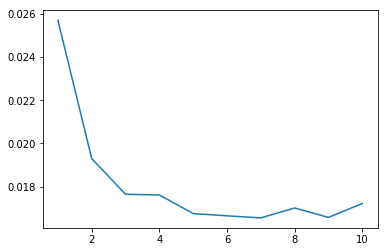

In [57]:
%matplotlib inline
plt.plot(result_xg.keys(),result_xg.values())
plt.show()

**得到最优模型**

In [58]:
best_xg=XGBRegressor(max_depth=result_xg_sorted[0][0])
best_xg.fit(train_x_dummy,train_y_dummy)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## Ensemble

集成算法算是能够在不过拟合的情况下，对性能进行进一步的提升。

这里我们用简单的stacking来做一个ensemble。

对于stacking而言，就是将不同回归器的值，作为输入，输入到一个模型中，然后将这个模型的输出作为最终结果。

比如，两个模型，一个回归预测为1，一个回归预测为2，那么stacking最终结果可以是求个均值（1+2）/2=1.5

这里我们也这么做吧。

**获得不同的回归器的结果**

In [75]:
predict_rf=best_randomforest.predict(test_x_dummy)
predict_bg=best_bagging.predict(test_x_dummy)
predict_bt=best_ada_model.predict(test_x_dummy)
predict_xg=best_xg.predict(test_x_dummy)

**将结果变换回去**

记得之前我们对y值做了个一个log嘛，现在在做最终的stacking之前，需要将这个结果给变回去。

还好，numpy提供了简单的方法帮我们做这个事。

In [76]:
# result_lr_y=np.expm1(result_lr)
result_rf_y=np.expm1(predict_rf)
result_bg_y=np.expm1(predict_bg)
result_bt_y=np.expm1(predict_bt)
result_xg_y=np.expm1(predict_xg)
max(result_rf_y),max(result_bg_y),max(result_bt_y),max(result_xg_y)

(497072.4159553254, 865001.1131350818, 364807.71827162197, 493926.78)

In [77]:
min(result_rf_y),min(result_bg_y),min(result_bt_y),min(result_xg_y)

(49659.34518068823, 44891.17228028883, 48851.73808258196, 48410.734)

## 编辑提交结果

**计算均值**

In [78]:
result_final=(result_rf_y+result_bg_y+result_bt_y+result_xg_y)/4
result_final.shape

(1459,)

**构造提交结果**

In [79]:
result_final_df=pd.DataFrame(data={'Id':test_x_dummy.index,'SalePrice':result_final})
submission_df=result_final_df.copy()

**创建csv文件，保存到本地**

In [85]:
submission_df.to_csv('house_pricing5.csv',index=False)

**尴尬的发现没有提升= - ，那么我们直接用xgboost的结果看看**

光用xgboost也没有提升= - 

In [210]:
result_final_xg=pd.DataFrame(data={'Id':test_x_dummy.index,'SalePrice':result_xg_y})
submission_xg=result_final_xg.copy()

In [211]:
submission_xg.to_csv('house_pricing4.csv',index=False)